# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [1]:
import pandas as pd

## Part 1: Combine multiple DataFrame objects to a large dataframe ( 5 pts )

Given the following temperature datasets, combine them to a large dataframe using `pandas.concat` command

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [2]:
# Upload the datasets as data frames
url1 = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv"
df1 = pd.read_csv(url1)

url2 = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv"
df2 = pd.read_csv(url2)

In [3]:
# Use pd.concat command to combine the two data frames
df_concat = pd.concat([df1, df2], ignore_index=True)
df_concat

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181216,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0
181217,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0
181218,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN
181219,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [4]:
# Upload the datasets as data frames
url3 = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv"
df_3 = pd.read_csv(url3)

url4 = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv"
df_4 = pd.read_csv(url4)

In [5]:
# Create a column of FIPS code for df_4 using the first two indices of the "ID" column
df_4["FIPS 10-4"] = df_4["ID"].str[0:2]

# Use pd.merge command to merge the two data frames with a common column "FIPS 10-4"
df_merge = pd.merge(df_3, df_4, on = ["FIPS 10-4"])
df_merge

,FIPS 10-4,ISO 3166,Name,ID,LATITUDE,LONGITUDE,STNELEV,NAME
0,AF,AF,Afghanistan,AF000040930,35.317,69.017,3366.0,NORTH_SALANG
1,AF,AF,Afghanistan,AFM00040911,36.700,67.200,378.0,MAZAR_I_SHARIF
2,AF,AF,Afghanistan,AFM00040938,34.210,62.228,977.2,HERAT
3,AF,AF,Afghanistan,AFM00040948,34.566,69.212,1791.3,KABUL_INTL
4,AF,AF,Afghanistan,AFM00040990,31.500,65.850,1010.0,KANDAHAR_AIRPORT
...,...,...,...,...,...,...,...,...
27578,ZI,ZW,Zimbabwe,ZI000067983,-20.200,32.616,1132.0,CHIPINGE
27579,ZI,ZW,Zimbabwe,ZI000067991,-22.217,30.000,457.0,BEITBRIDGE
27580,ZI,ZW,Zimbabwe,ZIXLT371333,-17.830,31.020,1471.0,HARARE_BELVEDERE
27581,ZI,ZW,Zimbabwe,ZIXLT443557,-18.980,32.450,1018.0,GRAND_REEF


In [6]:
# Merge the data frame with the data frame created in part 1, with the common column "ID"
df = pd.merge(df_concat, df_merge, on = ["ID"])
df

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,...,VALUE10,VALUE11,VALUE12,FIPS 10-4,ISO 3166,Name,LATITUDE,LONGITUDE,STNELEV,NAME
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,...,1604.0,1364.0,1004.0,AG,DZ,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,...,1694.0,1494.0,1134.0,AG,DZ,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,...,1926.0,1356.0,1056.0,AG,DZ,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,...,1826.0,1376.0,1246.0,AG,DZ,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,...,1716.0,1386.0,1076.0,AG,DZ,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181310,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,...,NaN,2298.0,2199.0,ZI,ZW,Zimbabwe,-20.2000,32.616,1132.0,CHIPINGE
181311,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,...,1967.0,2258.0,2142.0,ZI,ZW,Zimbabwe,-20.2000,32.616,1132.0,CHIPINGE
181312,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2110.0,2297.0,NaN,ZI,ZW,Zimbabwe,-20.2000,32.616,1132.0,CHIPINGE
181313,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,...,2290.0,2230.0,2405.0,ZI,ZW,Zimbabwe,-20.2000,32.616,1132.0,CHIPINGE


In [7]:
# Drop the useless columns
df = df.drop(["FIPS 10-4", "ISO 3166"], axis = 1)

In [8]:
# Set the columns except the temperature value ones as the index of the data frame, then stack the data values
df = df.set_index(keys=["ID", "Year", "Name", "LATITUDE", "LONGITUDE", "STNELEV", "NAME"]).stack()
df

ID           Year  Name      LATITUDE  LONGITUDE  STNELEV  NAME                       
AG000060390  1901  Algeria    36.7167  3.250      24.0     ALGER_DAR_EL_BEIDA  VALUE1     1034.0
                                                                               VALUE2      844.0
                                                                               VALUE3     1164.0
                                                                               VALUE4     1534.0
                                                                               VALUE5     1564.0
                                                                                           ...  
ZI000067983  2016  Zimbabwe  -20.2000  32.616     1132.0   CHIPINGE            VALUE5     1692.0
                                                                               VALUE6     1681.0
                                                                               VALUE8     1828.0
                                        

In [9]:
# Reset the index to recover the columns
df = df.reset_index()

In [10]:
# Rename the column names to appropriately label them
df = df.rename(columns = {"Name": "Country", "level_7": "Month" , 0: "Temp"})
df

,ID,Year,Country,LATITUDE,LONGITUDE,STNELEV,NAME,Month,Temp
0,AG000060390,1901,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,VALUE1,1034.0
1,AG000060390,1901,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,VALUE2,844.0
2,AG000060390,1901,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,VALUE3,1164.0
3,AG000060390,1901,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,VALUE4,1534.0
4,AG000060390,1901,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,VALUE5,1564.0
...,...,...,...,...,...,...,...,...,...
1899682,ZI000067983,2016,Zimbabwe,-20.2000,32.616,1132.0,CHIPINGE,VALUE5,1692.0
1899683,ZI000067983,2016,Zimbabwe,-20.2000,32.616,1132.0,CHIPINGE,VALUE6,1681.0
1899684,ZI000067983,2016,Zimbabwe,-20.2000,32.616,1132.0,CHIPINGE,VALUE8,1828.0
1899685,ZI000067983,2016,Zimbabwe,-20.2000,32.616,1132.0,CHIPINGE,VALUE10,2334.0


In [11]:
# Adjust the "Month" with clear values
df["Month"] = df["Month"].str[5:].astype(int)
df

,ID,Year,Country,LATITUDE,LONGITUDE,STNELEV,NAME,Month,Temp
0,AG000060390,1901,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,1,1034.0
1,AG000060390,1901,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,2,844.0
2,AG000060390,1901,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,3,1164.0
3,AG000060390,1901,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,4,1534.0
4,AG000060390,1901,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,5,1564.0
...,...,...,...,...,...,...,...,...,...
1899682,ZI000067983,2016,Zimbabwe,-20.2000,32.616,1132.0,CHIPINGE,5,1692.0
1899683,ZI000067983,2016,Zimbabwe,-20.2000,32.616,1132.0,CHIPINGE,6,1681.0
1899684,ZI000067983,2016,Zimbabwe,-20.2000,32.616,1132.0,CHIPINGE,8,1828.0
1899685,ZI000067983,2016,Zimbabwe,-20.2000,32.616,1132.0,CHIPINGE,10,2334.0


In [12]:
# Since the temperature values are in hundredths of a degree, divided all the values by 100
df["Temp"] = df["Temp"] / 100
df

,ID,Year,Country,LATITUDE,LONGITUDE,STNELEV,NAME,Month,Temp
0,AG000060390,1901,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,1,10.34
1,AG000060390,1901,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,2,8.44
2,AG000060390,1901,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,3,11.64
3,AG000060390,1901,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,4,15.34
4,AG000060390,1901,Algeria,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,5,15.64
...,...,...,...,...,...,...,...,...,...
1899682,ZI000067983,2016,Zimbabwe,-20.2000,32.616,1132.0,CHIPINGE,5,16.92
1899683,ZI000067983,2016,Zimbabwe,-20.2000,32.616,1132.0,CHIPINGE,6,16.81
1899684,ZI000067983,2016,Zimbabwe,-20.2000,32.616,1132.0,CHIPINGE,8,18.28
1899685,ZI000067983,2016,Zimbabwe,-20.2000,32.616,1132.0,CHIPINGE,10,23.34


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [13]:
'''
Arguments: df: the data frame, country: the country name (str), 
           year_begin: the earliest year (int), year-end: the latest year (int), month: the month (int)
Output: a data frame with the expected country, beginning and ending year, and month
'''

def query_climate(df, country, year_begin, year_end, month):
    # check if the country and year range is the same with argument entered
    df_target = df[(df["Country"] == country) & (df["Year"].between(year_begin, year_end))]
    # check if the month is the same with the argument entered
    df_target = df_target[df_target["Month"] == month]
    # the desired result gives the columns of "NAME", "LATITUDE", "LONGITUDE", "Country", "Year", "Month", "Temp" in order
    df_result = df_target[["NAME", "LATITUDE", "LONGITUDE", "Country", "Year", "Month", "Temp"]]
    return df_result

Run this example and check if you get the correct result, your obtained dataframe looks like:

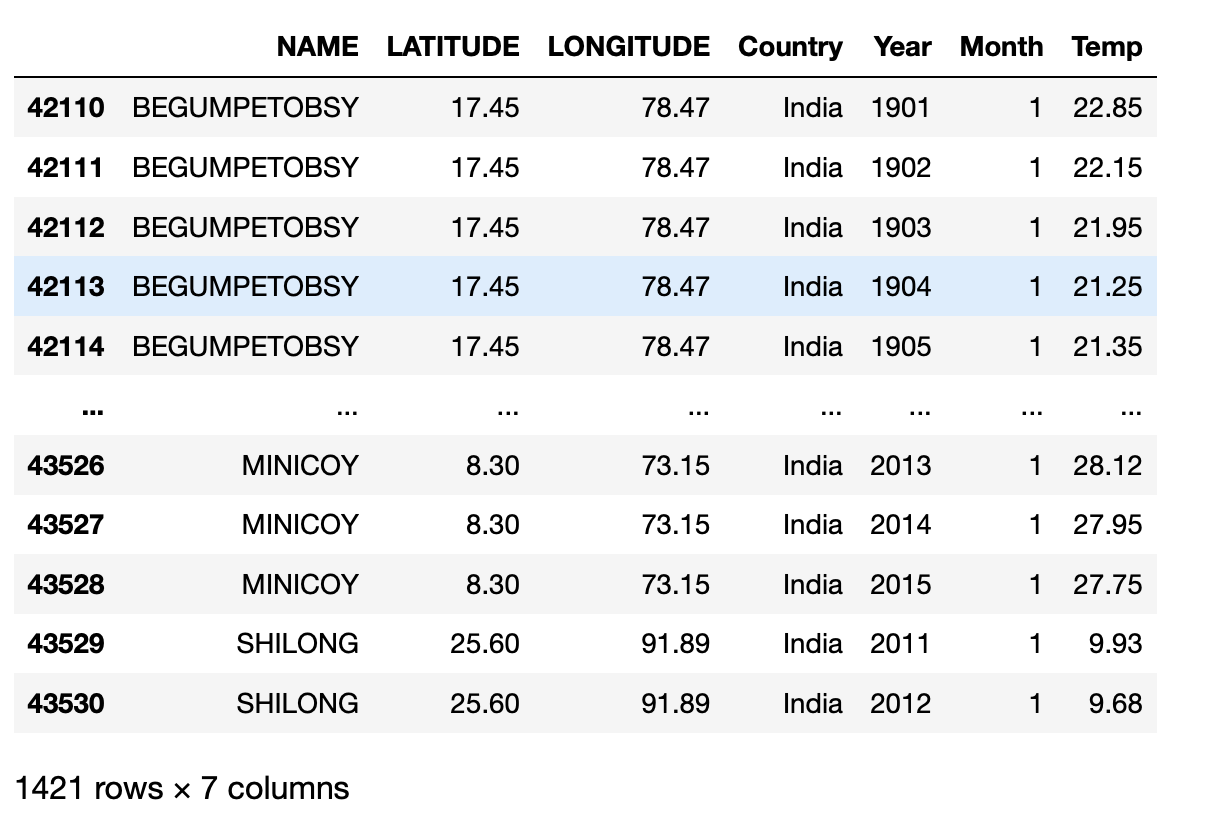

In [14]:
# the passing dataframe 'df' below is the dataframe you create in part 2
query_climate(df = df, country = "India", year_begin = 1901, year_end = 2020, month = 1)

,NAME,LATITUDE,LONGITUDE,Country,Year,Month,Temp
113048,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
113060,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
113072,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
113084,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
113096,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
987771,MINICOY,8.30,73.15,India,2013,1,28.12
987783,MINICOY,8.30,73.15,India,2014,1,27.95
987795,MINICOY,8.30,73.15,India,2015,1,27.75
987799,SHILONG,25.60,91.89,India,2011,1,9.93


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

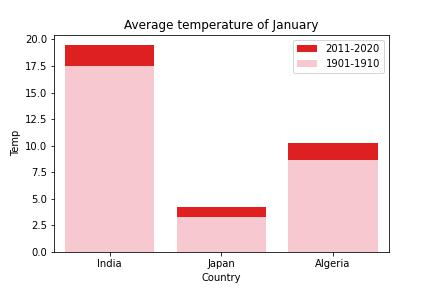

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

In [15]:
# Define a function to compute the average temperatures for each country in each month

'''
Arguments: df: the data frame, countries: a list of the expected countries (list), months: a list of expected months number (list),
           range_1: the first expected year range (tuple), range_2: the second expected year range (tuple)
Output: a dictionary include the country name and month as keys, the average temperature for the two year ranges as values
'''

def average(df, countries, months, range_1, range_2):
    # Create an empty dictionary to include country name and month as keys, average temperatures as values in later steps
    avg_temp = {}
    # Use for loop to iterate over the list of countries
    for country in countries:
        # Use for loop to iterate over the list of months
        for month in months:
            # Use mean() command to compute the average temperature for the country in month for different year ranges, respectively
            avg_temp_range1 = df[(df["Country"] == country) & (df["Year"].between(range_1[0], range_1[1])) & (df["Month"] == month)]["Temp"].mean()
            avg_temp_range2 = df[(df["Country"] == country) & (df["Year"].between(range_2[0], range_2[1])) & (df["Month"] == month)]["Temp"].mean()
            # Set the result values as the values of the dictionary, with country and month as keys
            avg_temp[(country, month)] = (avg_temp_range1, avg_temp_range2)
    return avg_temp

In [16]:
# Selected countries: India, Japan, Australia, Italy
# Selected months: January, February, March, April, May, June
countries = ["India", "Japan", "Australia", "Italy"]
months = [1, 2, 3, 4, 5, 6]
range_1 = (1901, 1910)
range_2 = (2011, 2020)

In [17]:
# Calculate the average temperature values
avg_temps = average(df, countries, months, range_1, range_2)
avg_temps

{('India', 1): (17.53542268041237, 19.483325330132054),
 ('India', 2): (18.895676229508197, 22.23732057416268),
 ('India', 3): (22.943934426229507, 25.78754784688995),
 ('India', 4): (26.517248459958935, 29.17808588957055),
 ('India', 5): (28.80084188911704, 31.16195652173913),
 ('India', 6): (28.420224948875255, 30.097209580838324),
 ('Japan', 1): (3.3172336769759454, 4.216799191374663),
 ('Japan', 2): (2.6011168384879726, 4.963532572196105),
 ('Japan', 3): (6.249604810996564, 8.395377358490567),
 ('Japan', 4): (11.837061855670104, 12.988817998656815),
 ('Japan', 5): (15.836540447504301, 17.912360457296572),
 ('Japan', 6): (19.920979381443296, 21.1669199731002),
 ('Australia', 1): (23.387252252252253, 24.518163972286374),
 ('Australia', 2): (22.844221652786675, 23.822450726978992),
 ('Australia', 3): (20.834330097087378, 22.143039215686272),
 ('Australia', 4): (17.992600518806743, 19.121920277869666),
 ('Australia', 5): (14.71618028534371, 15.518227265252426),
 ('Australia', 6): (11.7

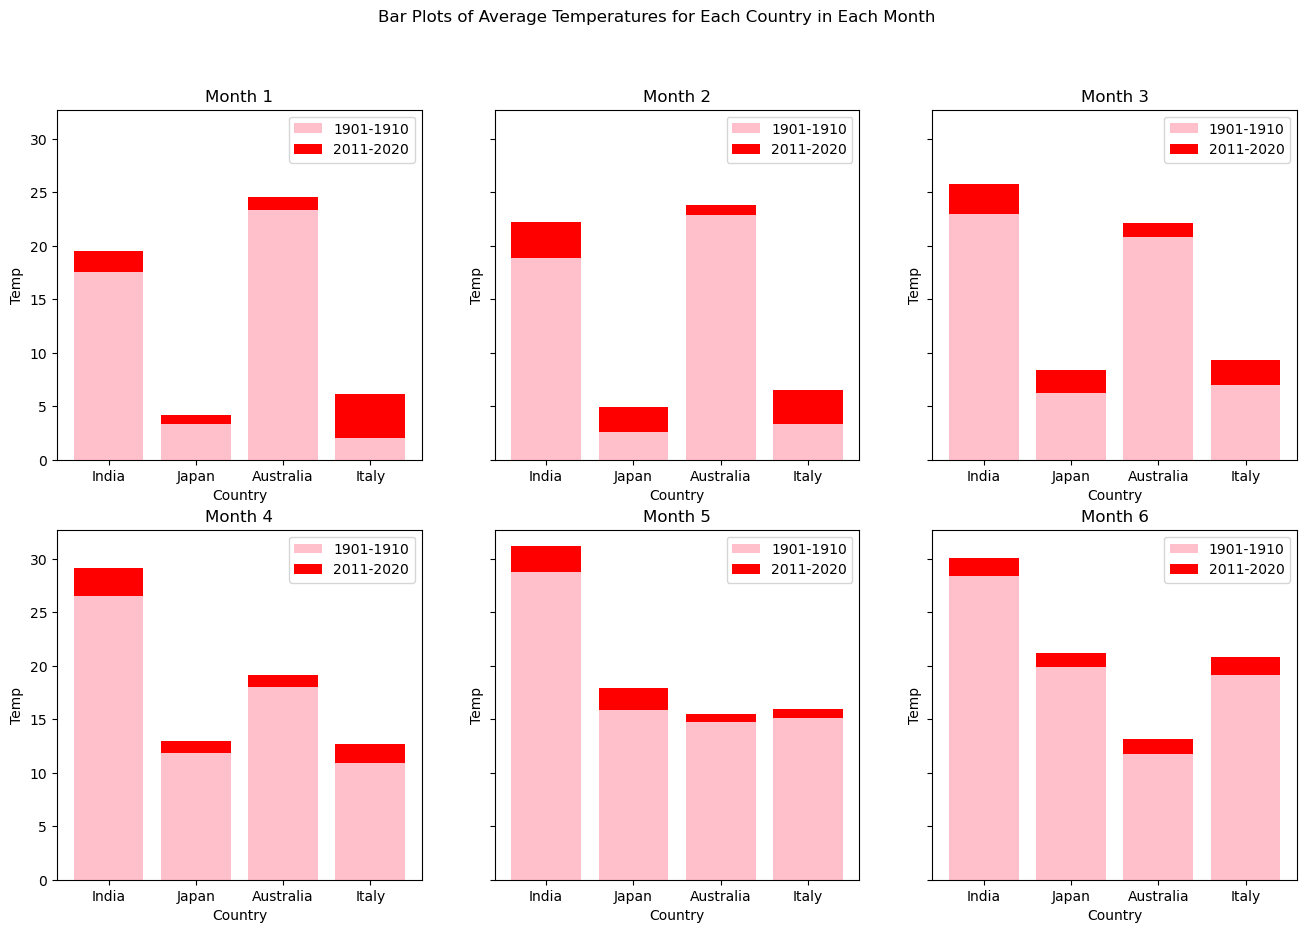

In [18]:
# Draw subplots
import matplotlib.pyplot as plt
import seaborn as sns

'''
Argument: a dictionary with country and month as keys, average temperature values for the two year ranges as values
Output: a barplot that include six plots for different months, each has the average temperature values as bars in it
'''

def barplot(avg_temp):
    # Create the subplots and super title
    fig, axs = plt.subplots(2, 3, sharey=True, figsize=(16, 10))
    fig.suptitle('Bar Plots of Average Temperatures for Each Country in Each Month')

    # Use for loops to iterate through each row and column for the subplots
    for row in range(2):
        for col in range(3):
            # Locate the plots with axs[row, col]
            ax = axs[row, col]
            # Calculate the month for the current plot
            month = months[row * 3 + col] 
            # Use for loop to unpack the tuple key of the dictionary
            for key in avg_temp:
                country, temp_month = key
                # Check if current month matches the current subplot month
                if temp_month == month:
                    # Unpack the tuple value of the dictionary
                    avg_temp_range1, avg_temp_range2 = avg_temp[key]

                    # Set subplot title
                    ax.set_title(f"Month {month}")
                    
                    # Plot the average temperature values for each year range
                    ax.bar(country, avg_temp_range1, color='pink')
                    ax.bar(country, avg_temp_range2 - avg_temp_range1, bottom=avg_temp_range1, color='red')

                    # Set the x and y labels as Country and Temp, respectively
                    ax.set_xlabel('Country')
                    ax.set_ylabel('Temp')
            
            # Draw the legend for each subplot        
            ax.legend(labels = ["1901-1910", "2011-2020"])
            
    plt.show()

barplot(avg_temps)

Conclusion: 
Overall, for all the four countries, the average temperatures in the year range of 2011-2020 are higher than 1901-1910, showing the possible increase of the world temperature.

In January, February, and March, Japan always has lower temperatures than the other three countries, around 5 Celsius.

In April, May, and June, India always has higher temperatures than the other three countries, around 30 Celsius.

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

In [19]:
# Generate Asian countries list and compute the average temperatures for each country in each month (year ranges in 1901-1910 and 2011-2020)
asia_countries = ['India', 'Japan', 'China']
asia_df = df[df['Country'].isin(asia_countries)]
months = [1,2,3,4,5,6,7,8,9,10,11,12]
avg_asia = average(asia_df, asia_countries, months, range_1, range_2)
avg_asia

{('India', 1): (17.53542268041237, 19.483325330132054),
 ('India', 2): (18.895676229508197, 22.23732057416268),
 ('India', 3): (22.943934426229507, 25.78754784688995),
 ('India', 4): (26.517248459958935, 29.17808588957055),
 ('India', 5): (28.80084188911704, 31.16195652173913),
 ('India', 6): (28.420224948875255, 30.097209580838324),
 ('India', 7): (26.713224489795916, 28.31735894357743),
 ('India', 8): (26.08378600823045, 27.874303030303032),
 ('India', 9): (25.90280991735537, 27.825570388349515),
 ('India', 10): (24.50314928425358, 26.73827130852341),
 ('India', 11): (21.04248472505092, 23.59120192307692),
 ('India', 12): (17.96839835728953, 20.525685096153843),
 ('Japan', 1): (3.3172336769759454, 4.216799191374663),
 ('Japan', 2): (2.6011168384879726, 4.963532572196105),
 ('Japan', 3): (6.249604810996564, 8.395377358490567),
 ('Japan', 4): (11.837061855670104, 12.988817998656815),
 ('Japan', 5): (15.836540447504301, 17.912360457296572),
 ('Japan', 6): (19.920979381443296, 21.1669199

In [20]:
# Generate European countries list and compute the average temperatures for each country in each month (year ranges in 1901-1910 and 2011-2020)
euro_countries = ['Germany', 'France', 'Italy']
euro_df = df[df['Country'].isin(euro_countries)]
months = [1,2,3,4,5,6,7,8,9,10,11,12]
avg_euro = average(euro_df, euro_countries, months, range_1, range_2)
avg_euro

{('Germany', 1): (-0.9250449101796409, 1.1556102362204725),
 ('Germany', 2): (-0.21501497005988027, 0.811697357886309),
 ('Germany', 3): (2.9062125748502994, 4.654118119726798),
 ('Germany', 4): (6.573427719821163, 9.193400564743849),
 ('Germany', 5): (11.561674140508222, 12.857826612903228),
 ('Germany', 6): (15.030358208955224, 16.306756865912764),
 ('Germany', 7): (16.346964285714286, 18.08380395320694),
 ('Germany', 8): (15.567600596125187, 18.293636733035353),
 ('Germany', 9): (12.393244047619048, 14.410386784850928),
 ('Germany', 10): (8.46189269746647, 9.987478890229193),
 ('Germany', 11): (2.7314115898959885, 5.210867635189668),
 ('Germany', 12): (0.17203869047619053, 3.120555780933063),
 ('France', 1): (4.189538461538461, 5.941191222570533),
 ('France', 2): (4.672461538461537, 5.727708674304418),
 ('France', 3): (7.585538461538461, 8.86930693069307),
 ('France', 4): (10.760307692307693, 11.808632619439868),
 ('France', 5): (14.367846153846154, 14.63257048092869),
 ('France', 6

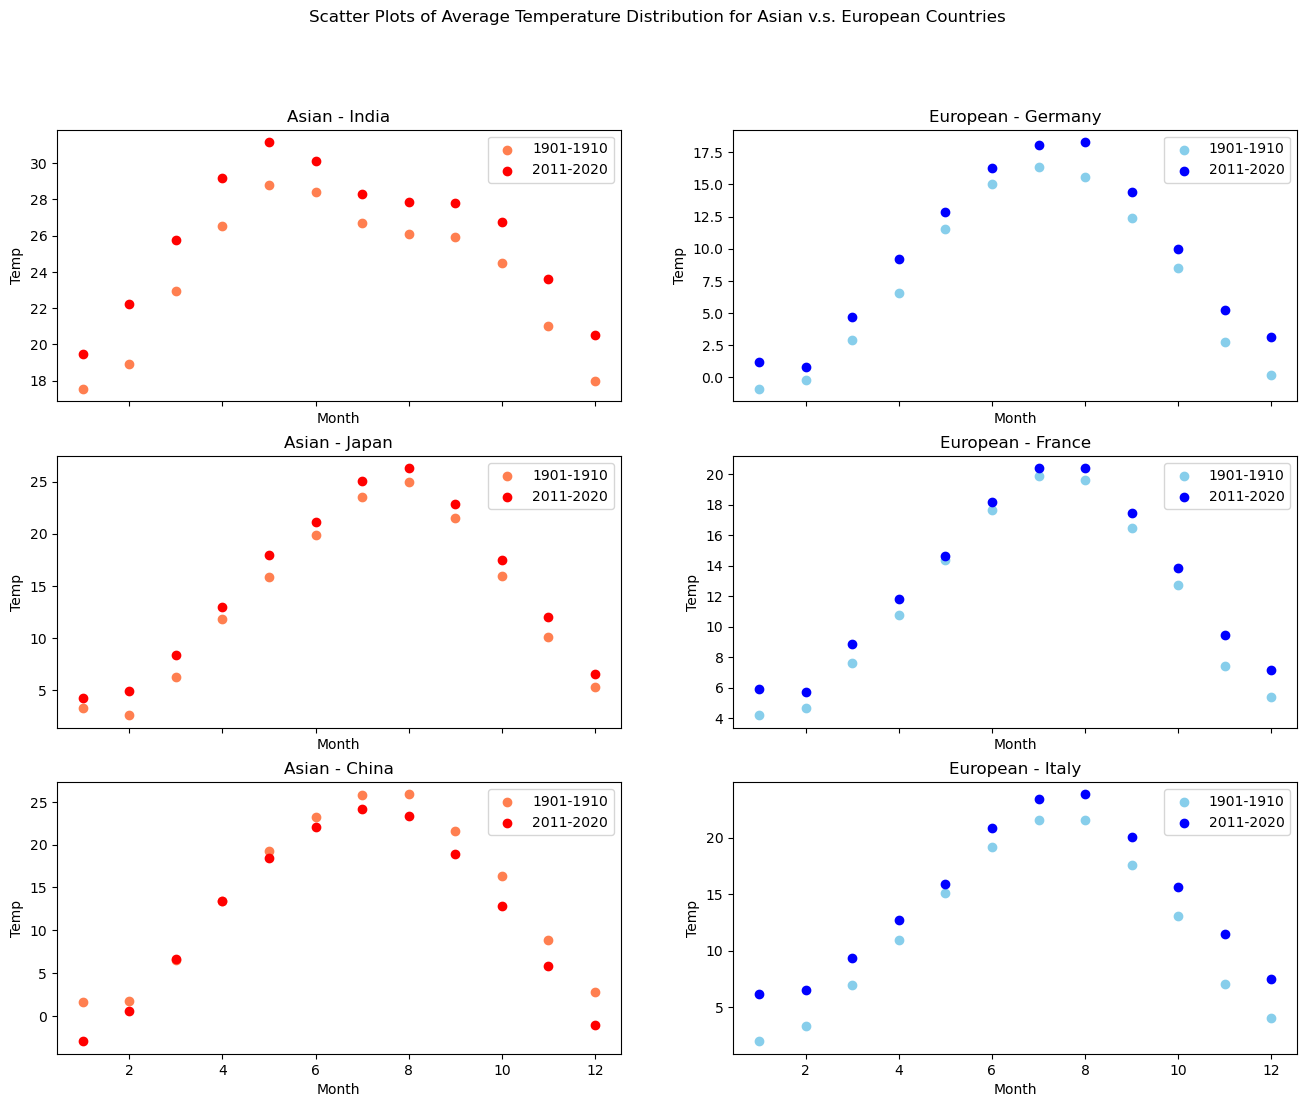

In [21]:
# Draw Scatter Plots of Average Temperature for Asian and European Countries over Months (year ranges in 1901-1910 and 2011-2020)

# Create subplots and super title
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(16, 12))
fig.suptitle('Scatter Plots of Average Temperature Distribution for Asian v.s. European Countries')

# Initialize row as 0
row = 0

# Iterate through Asian countries
for country in asia_countries:
    # Draw in the first column
    ax = axs[row, 0]
    
    # Access the temperature value for the current country
    temp_data = {month: temps for (c, month), temps in avg_asia.items() if c == country}
    # Access the temperature data for each year range
    year_range_1 = [temp_data.get(month, (None, None))[0] for month in months]
    year_range_2 = [temp_data.get(month, (None, None))[1] for month in months]

    # Plot the temperature values for each year range as scatters
    ax.scatter(months, year_range_1, color='coral', label='1901-1910')
    ax.scatter(months, year_range_2, color='red', label='2011-2020')

    # Set titles and labels for each subplot
    ax.set_title(f'Asian - {country}')
    ax.set_xlabel("Month")
    ax.set_ylabel('Temp')
    ax.legend()

    # Move to the next row
    row += 1


# Initialize row as 0
row = 0

# Iterate through European countries
for country in euro_countries:
    # Draw in the second column
    ax = axs[row, 1]
    
    # Access the temperature value for the current country
    temp_data = {month: temps for (c, month), temps in avg_euro.items() if c == country}
    # Access the temperature data for each year range
    year_range_1 = [temp_data.get(month, (None, None))[0] for month in months]
    year_range_2 = [temp_data.get(month, (None, None))[1] for month in months]

    # Plot the temperature values for each year range as scatters
    ax.scatter(months, year_range_1, color='skyblue', label='1901-1910')
    ax.scatter(months, year_range_2, color='blue', label='2011-2020')

    # Set titles and labels for each subplot
    ax.set_title(f'European - {country}')
    ax.set_xlabel("Month")
    ax.set_ylabel('Temp')
    ax.legend()
    
    # Move to the next row
    row += 1

# Show the final plot
plt.show()

From the scatter plots, we can observe the distrbution of the average temperatures in each country through the whole year. The temperature distributions are similar for the two year ranges, meaning that the temperature trend doesn't change a lot over the years in each country.

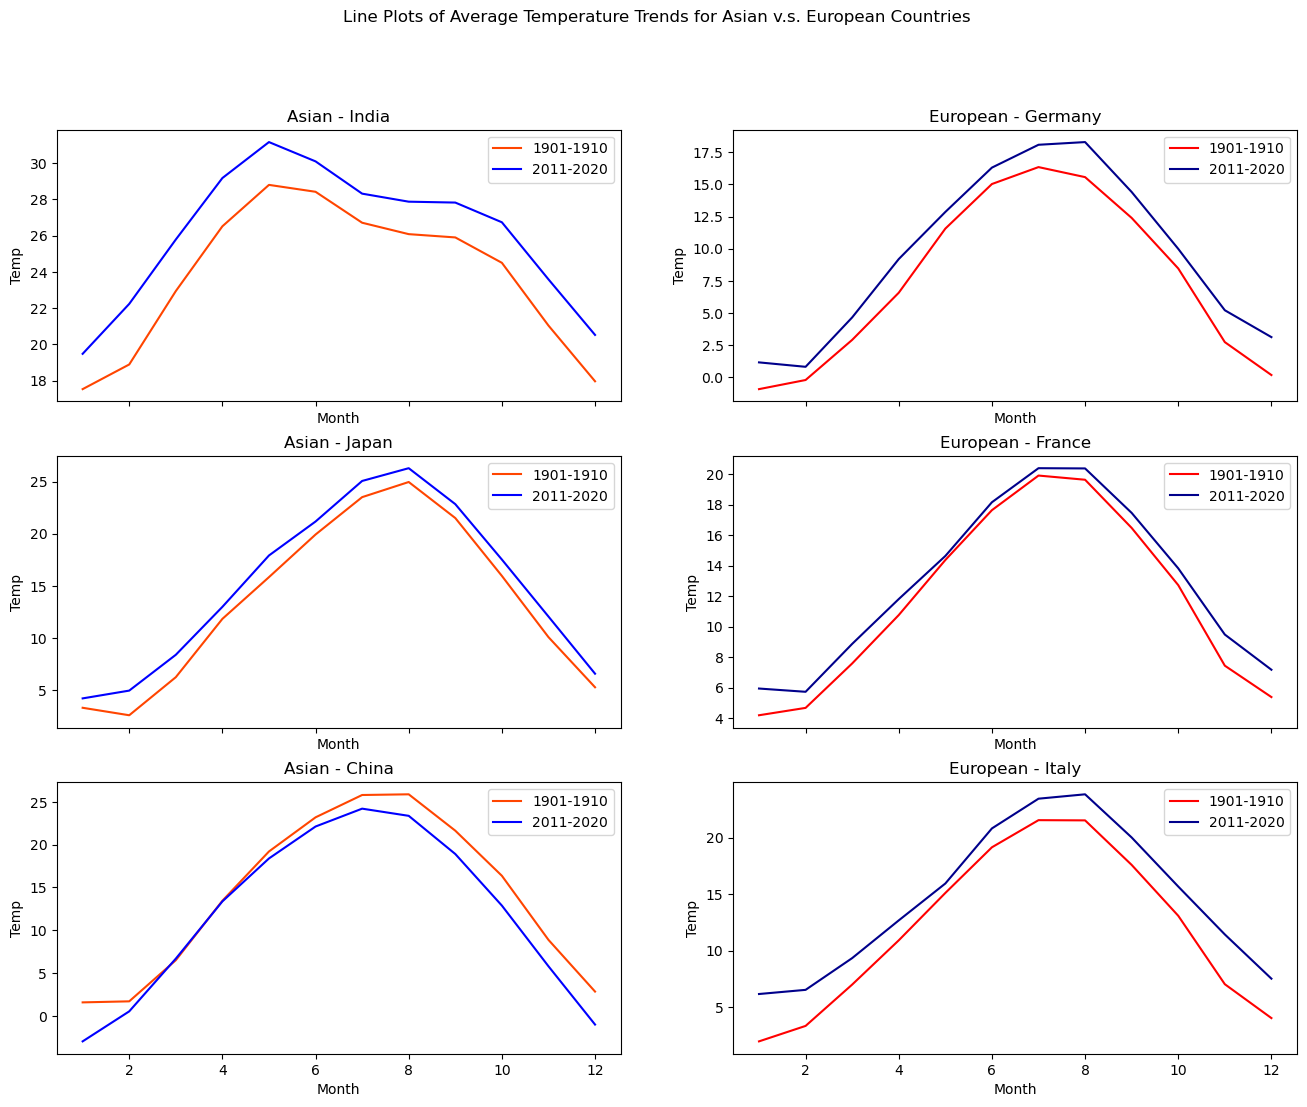

In [22]:
# Draw Line Plots of Average Temperature Trends for Asian and European Countries over Months (year ranges in 1901-1910 and 2011-2020)

# Create subplots and super title
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(16, 12))
fig.suptitle('Line Plots of Average Temperature Trends for Asian v.s. European Countries')

# Initialize row as 0
row = 0

# Iterate through Asian countries
for country in asia_countries:
    # Draw in the first column
    ax = axs[row, 0]
    
    # Access the temperature value for the current country
    temp_data = {month: temps for (c, month), temps in avg_asia.items() if c == country}
    # Access the temperature data for each year range
    year_range_1 = [temp_data.get(month, (None, None))[0] for month in months]
    year_range_2 = [temp_data.get(month, (None, None))[1] for month in months]

    # Plot the temperature values for each year range as lines
    ax.plot(months, year_range_1, color='orangered', label='1901-1910')
    ax.plot(months, year_range_2, color='blue', label='2011-2020')

    # Set titles and labels for each subplot
    ax.set_title(f'Asian - {country}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Temp')
    ax.legend()

    # Move to the next row
    row += 1


# Initialize row as 0
row = 0

# Iterate through European countries
for country in euro_countries:
    # Draw in the second column
    ax = axs[row, 1]
    
    # Access the temperature value for the current country
    temp_data = {month: temps for (c, month), temps in avg_euro.items() if c == country}
    # Access the temperature data for each year range
    year_range_1 = [temp_data.get(month, (None, None))[0] for month in months]
    year_range_2 = [temp_data.get(month, (None, None))[1] for month in months]

    # Plot the temperature values for each year range as lines
    ax.plot(months, year_range_1, color='red', label='1901-1910')
    ax.plot(months, year_range_2, color='darkblue', label='2011-2020')

    # Set titles and labels for each subplot
    ax.set_title(f'European - {country}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Temp')
    ax.legend()

    # Move to the next row
    row += 1

# Show the final plot
plt.show()

From the line plots, we can observe that for India, it has the highest temperature in May, and the other countries have the highest temperature in August. But all of them show an increase of temperature in the beginning of the year and a decrease of temperature at the end of the year.

By observing the y axis, it's obvious that in the middle of the year, the European countries have lower temperatures than Asian countries.

Besides, except for China, all the other countries have higher temperatures in the year range of 2011-2020 compared to 1901-1910, showing the increase of world temperature.

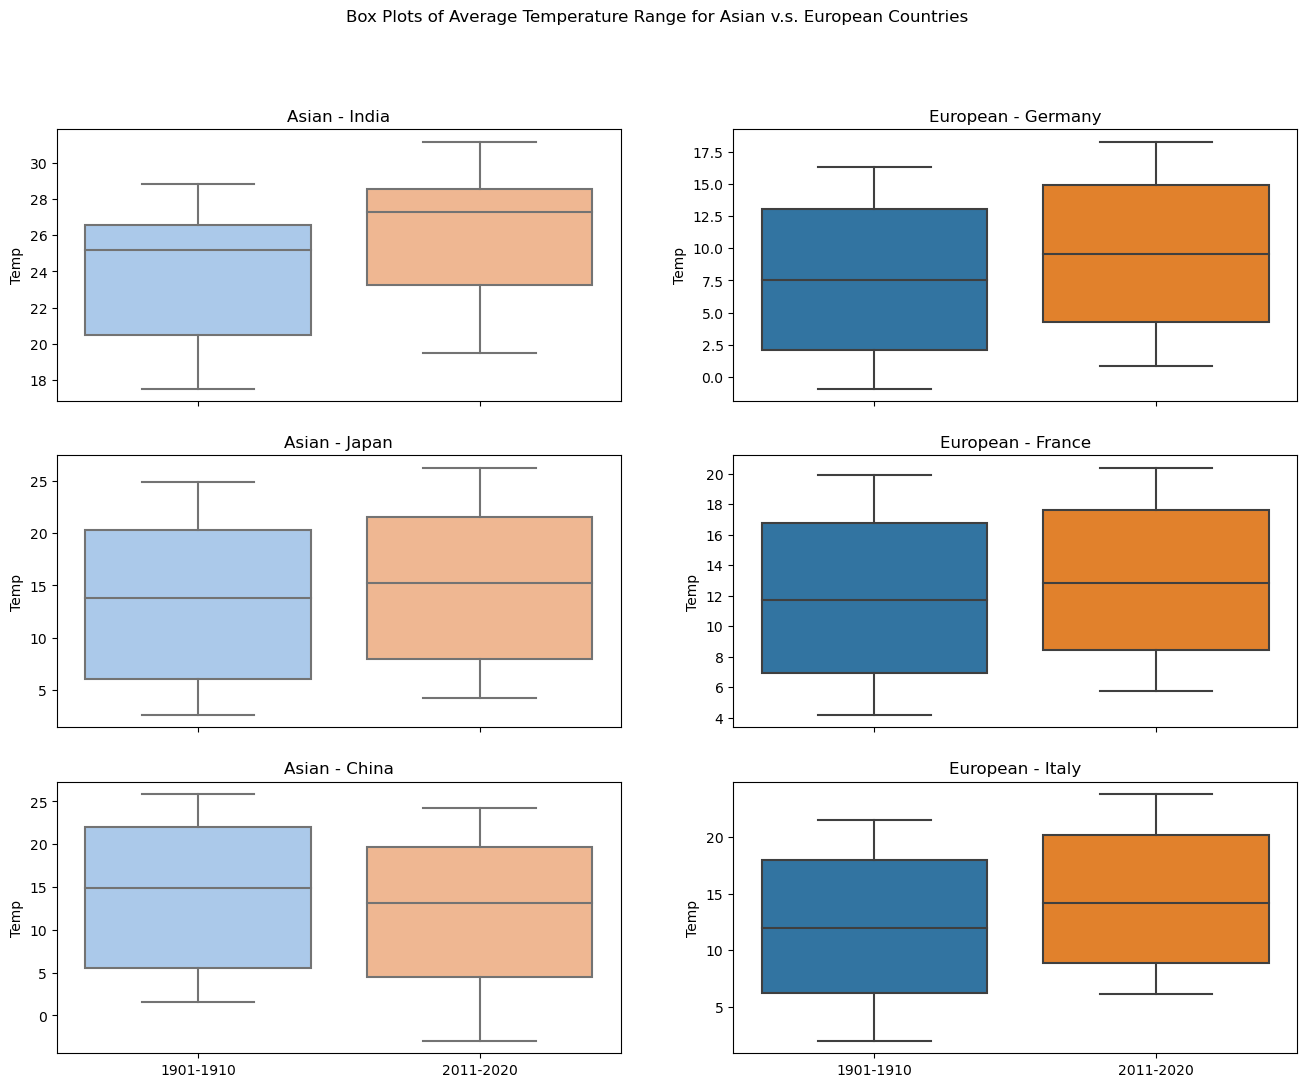

In [23]:
# Draw Box Plots of Average Temperature Range for Asian and European Countries over Months (year ranges in 1901-1910 and 2011-2020)

# Create subplots and super title
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(16, 12))
fig.suptitle('Box Plots of Average Temperature Range for Asian v.s. European Countries')

# Initialize row as 0
row = 0

# Iterate through Asian countries
for country in asia_countries:
    # Draw in the first column
    ax = axs[row, 0]
    
    # Access the temperature value for the current country
    temp_data = {month: temps for (c, month), temps in avg_asia.items() if c == country}
    # Access the temperature data for each year range
    year_range_1 = [temp_data.get(month, (None, None))[0] for month in months]
    year_range_2 = [temp_data.get(month, (None, None))[1] for month in months]

    # Plot the temperature values for each year range as boxplot
    sns.boxplot(data=[year_range_1, year_range_2], ax=ax, palette = "pastel")

    # Set titles and labels for each subplot
    ax.set_title(f'Asian - {country}')
    ax.set_xticklabels(['1901-1910', '2011-2020'])
    ax.set_ylabel('Temp')

    # Move to the next row
    row += 1


# Initialize row as 0
row = 0

# Iterate through European countries
for country in euro_countries:
    # Draw in the second column
    ax = axs[row, 1]
    
    # Access the temperature value for the current country
    temp_data = {month: temps for (c, month), temps in avg_euro.items() if c == country}
    # Access the temperature data for each year range
    year_range_1 = [temp_data.get(month, (None, None))[0] for month in months]
    year_range_2 = [temp_data.get(month, (None, None))[1] for month in months]

    # Plot the temperature values for each year range as boxplot
    sns.boxplot(data=[year_range_1, year_range_2], ax=ax)

    # Set titles and labels for each subplot
    ax.set_title(f'European - {country}')
    ax.set_xticklabels(['1901-1910', '2011-2020'])
    ax.set_ylabel('Temp')
    
    # Move to the next row
    row += 1

# Show the final plot
plt.show()

From the box plots, we can observe the statistics of average temperatures for each country, including the ranges and medians. For example, China had the year temperatures all above 0 Celsius during 1901 to 1910, but began to have negative Celsius temperature values during 2011 to 2020. On the contrary, Germany had negative temperature values during 1901-1910, but only had positive temperature values during 2011 to 2020. This difference in trends shows that the temperature changes may be opposite in different countries.

## Publish (5 pts)

Publish your work on github: Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link in this cell